In [53]:
import tensorflow as tf
import sys
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image as Image

model = load_model('./model/dogcat/dataext/24-0.6078.keras')

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,202,308 (19.85 MB)

 Trainable params: 2,601,153 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,601,155 (9.92 MB)

In [54]:
def load_and_preprocess_image(img_path):
    img = Image.load_img(img_path, target_size=(128, 128))
    img_array = Image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_and_plot_images(image_paths, labels):
    plt.figure(figsize=(20, 10))
    for i, img_path in enumerate(image_paths):
        img_array = load_and_preprocess_image(img_path)
        prediction = model.predict(img_array)[0][0]
        label = 'Dog' if prediction > 0.5 else 'Cat'

        plt.subplot(2, 10, i+1)
        plt.imshow(Image.load_img(img_path))
        plt.title(f"Pred: {label}\nActual: {labels[i]}")
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


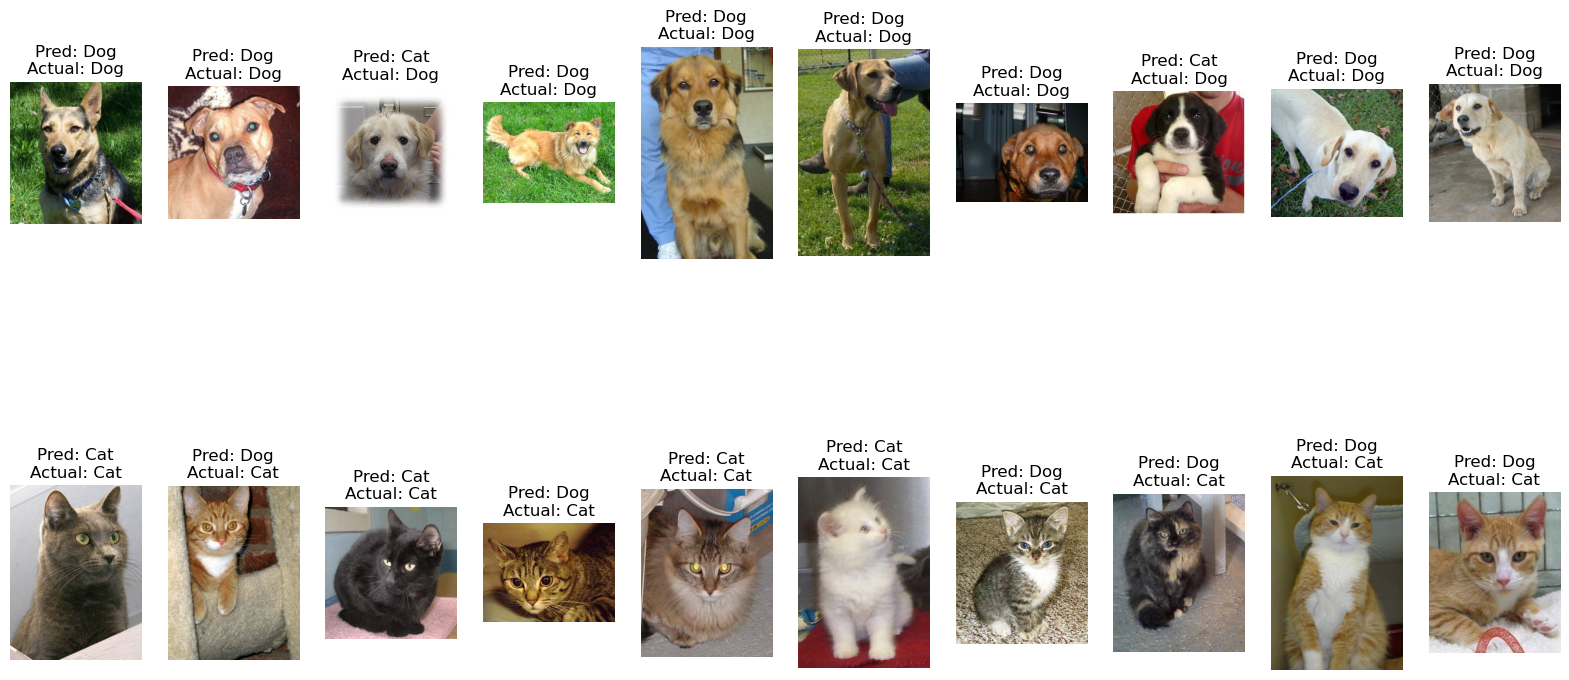

In [57]:
dog_image_paths = [f'./datas/dogcat/modeltesting/d{i}.jpg' for i in range(1, 11)]
cat_image_paths = [f'./datas/dogcat/modeltesting/c{i}.jpg' for i in range(1, 11)]

dog_labels = ['Dog']*10
cat_labels = ['Cat']*10

all_image_paths = dog_image_paths + cat_image_paths
all_labels = dog_labels + cat_labels

predict_and_plot_images(all_image_paths, all_labels)

In [ ]:
img = []
img_array = []
image_path = './datas/dogcat/modeltesting/'
test_predict = list()

for i in range(2):
    for j in range(10):
        if i == 0:
            img.append(Image.open(image_path + 'd{}.jpg'.format(i+1)))
        else:
            img.append(Image.open(image_path + 'c{}.jpg'.format(i+1)))

for i in range(20):
    print(img[i])
    img[i] = img[i].resize((128, 128))
    if img[i].mode != 'RGB':
        img[i]=img[i].convert('RGB')
    img_array.append(tf.keras.utils.img_to_array(img[i]))
    img_array[i] = img_array[i].astype('float32')/255
    plt.imshow(img_array[i])
    plt.show()
    img_array[i] = np.expand_dims(img_array[i], 0)
    prediction = model.predict(img_array[i])
    print(prediction)